# Portfolio Optimization
The portfolio optimization problem is a combinatorial optimization problem that seeks the optimal combination of assets based on the balance between risk and return.

## Cost Function
The cost function for solving the portfolio optimization problem is

$$
E = -\sum \mu_i q_i + \gamma \sum \delta_{i,j}q_i q_j
$$

The 1st term shows the return of the assets and the 2nd as risk we estimate.

## Example
Now, let's choose two of the six assets and find the optimal combination.

In [1]:
import numpy as np
from blueqat import vqe
from blueqat.pauli import I, X, Y, Z
from blueqat.pauli import from_qubo
from blueqat.pauli import qubo_bit as q
from blueqat import Circuit

Use the following as return data

In [3]:
asset_return = np.diag([-0.026,-0.031,-0.007,-0.022,-0.010,-0.055])
print(asset_return)

[[-0.026  0.     0.     0.     0.     0.   ]
 [ 0.    -0.031  0.     0.     0.     0.   ]
 [ 0.     0.    -0.007  0.     0.     0.   ]
 [ 0.     0.     0.    -0.022  0.     0.   ]
 [ 0.     0.     0.     0.    -0.01   0.   ]
 [ 0.     0.     0.     0.     0.    -0.055]]


Use the following as risk data

In [4]:
asset_risk = [[0,0.0015,0.0012,0.0018,0.0022,0.0012],[0,0,0.0017,0.0022,0.0005,0.0019],[0,0,0,0.0040,0.0032,0.0024],[0,0,0,0,0.0012,0.0076],[0,0,0,0,0,0.0021],[0,0,0,0,0,0]]
np.asarray(asset_risk)

array([[0.    , 0.0015, 0.0012, 0.0018, 0.0022, 0.0012],
       [0.    , 0.    , 0.0017, 0.0022, 0.0005, 0.0019],
       [0.    , 0.    , 0.    , 0.004 , 0.0032, 0.0024],
       [0.    , 0.    , 0.    , 0.    , 0.0012, 0.0076],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.0021],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    ]])

It is then converted to Hamiltonian and calculated. In addition, this time there is the constraint of selecting two out of six assets, which is implemented using XYmixer.

In [5]:
#convert qubo to pauli
qubo = asset_return + np.asarray(asset_risk)*0.5
hamiltonian = from_qubo(qubo)

init = Circuit(6).x[0,1]
mixer = I()*0
for i in range(5):
    for j in range(i+1, 6):
        mixer += (X[i]*X[j] + Y[i]*Y[j])*0.5

step = 1

result = vqe.Vqe(vqe.QaoaAnsatz(hamiltonian, step, init, mixer)).run()
print(result.most_common(12))

(((0, 0, 0, 0, 1, 1), 0.9999994909753838), ((0, 0, 1, 0, 0, 1), 5.082984897154482e-07), ((0, 0, 0, 1, 0, 1), 4.5366922587264707e-10), ((0, 1, 0, 0, 0, 1), 1.8161653052486483e-10), ((0, 0, 1, 0, 1, 0), 9.063023975859213e-11), ((0, 0, 0, 1, 1, 0), 1.618082643262117e-13), ((1, 0, 0, 0, 0, 1), 1.6228830532381364e-14), ((0, 1, 0, 0, 1, 0), 1.618262335727315e-14), ((0, 1, 0, 1, 0, 0), 9.246381676299576e-17), ((0, 0, 1, 1, 0, 0), 8.260881354525854e-20), ((1, 0, 0, 1, 0, 0), 1.650702183251039e-20), ((0, 1, 1, 0, 0, 0), 8.25793442702573e-21))


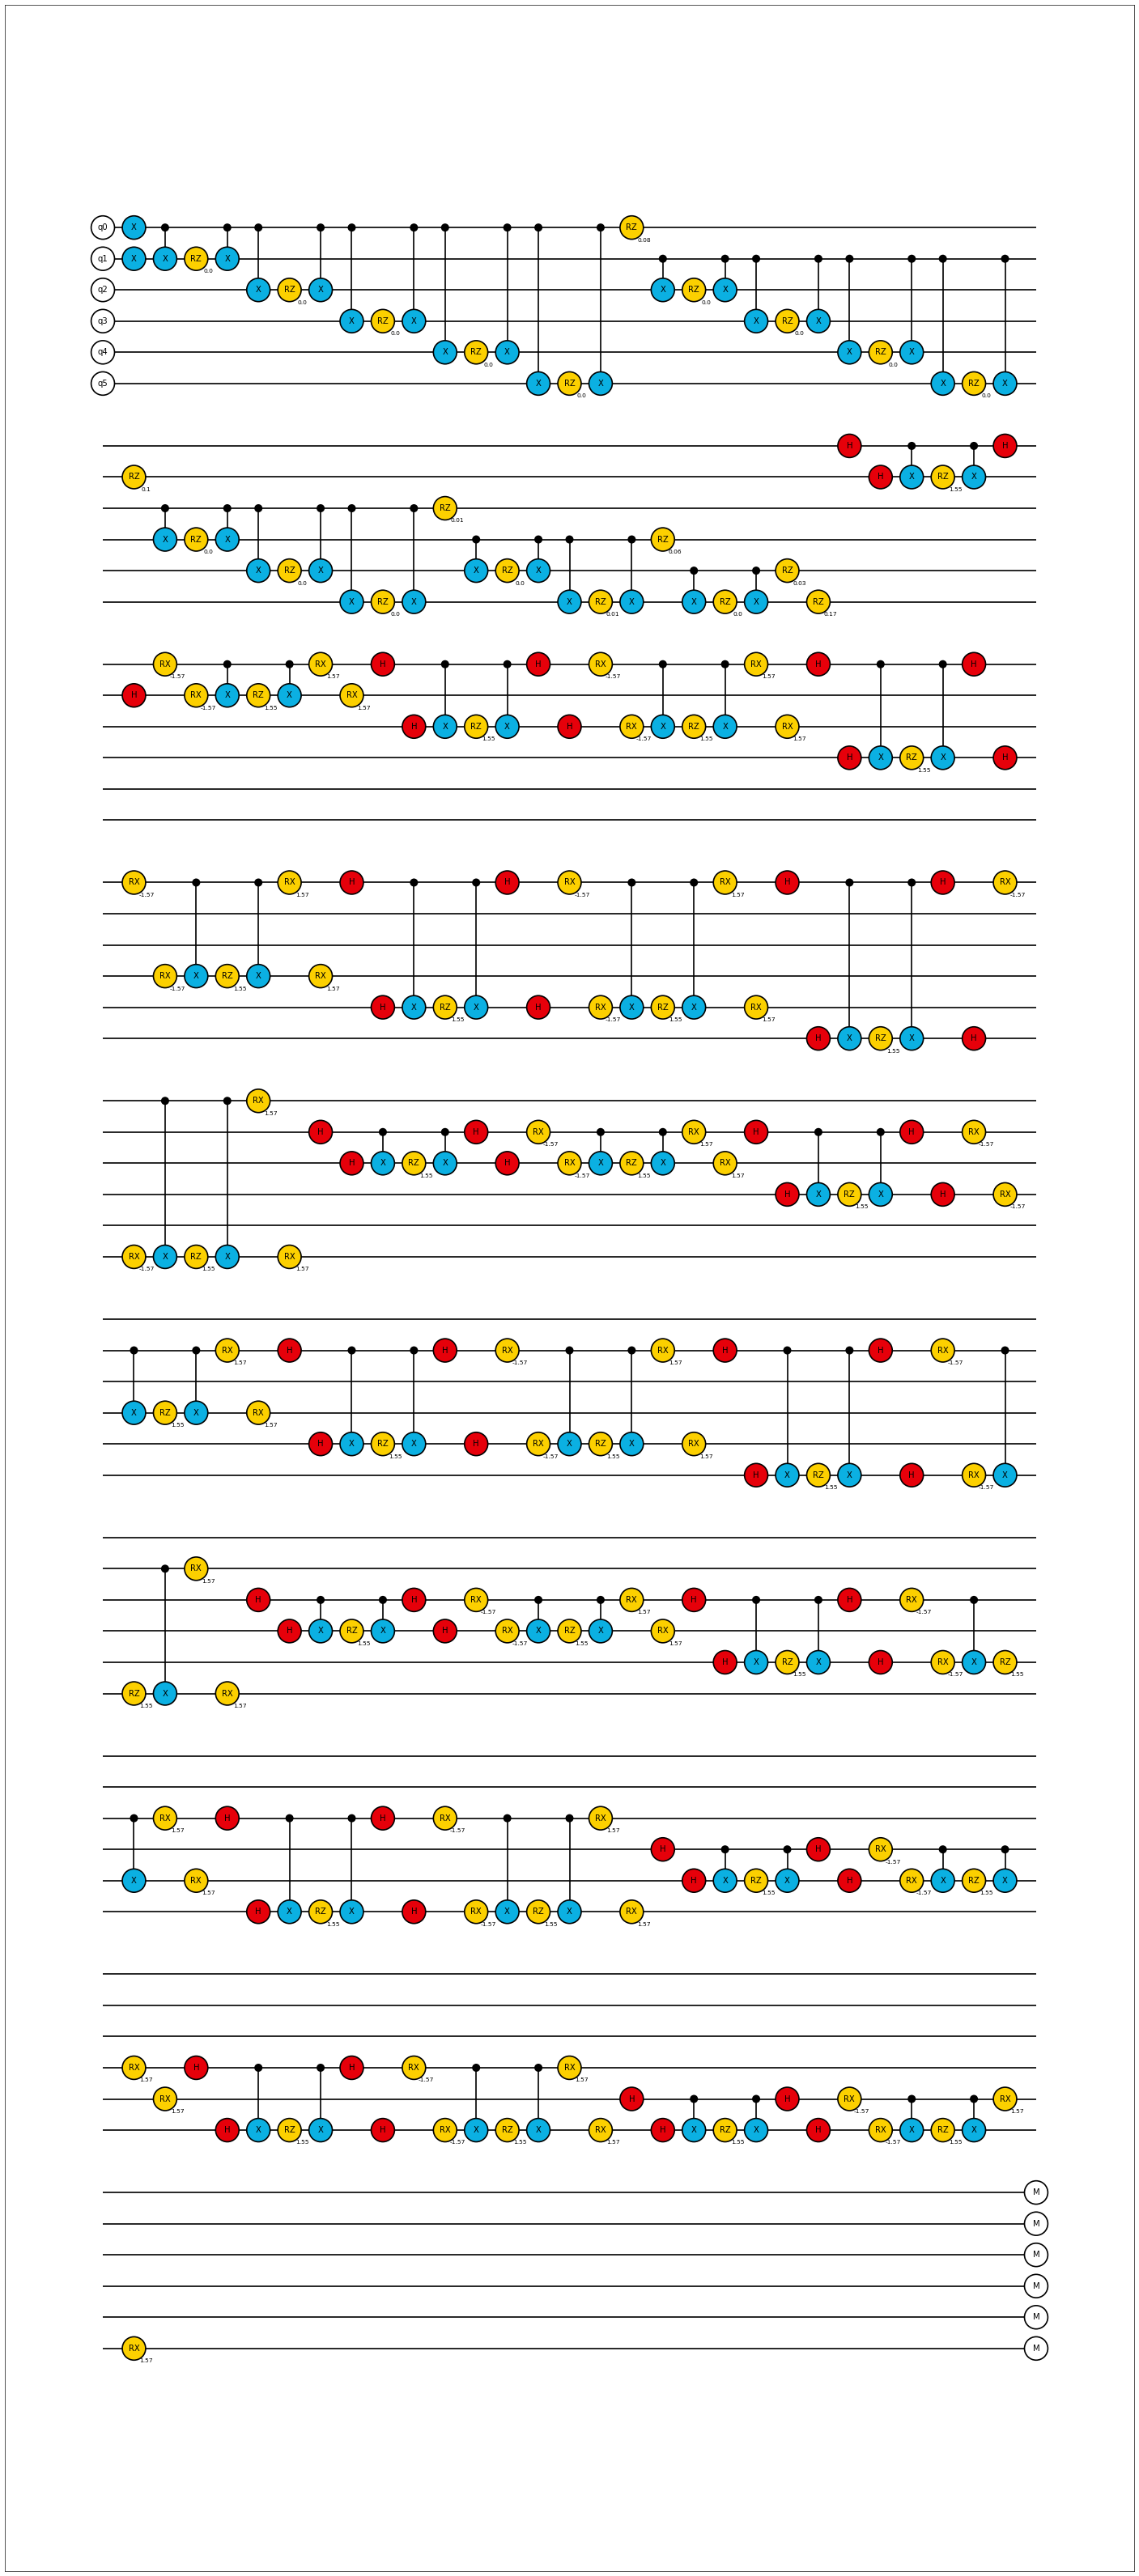

In [6]:
result.circuit.run(backend="draw")